# Experiment 01: Influence of number of centers

In [3]:
%matplotlib inline

import os
import sys
import copy
import time
import pickle
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

## Loading data 2D

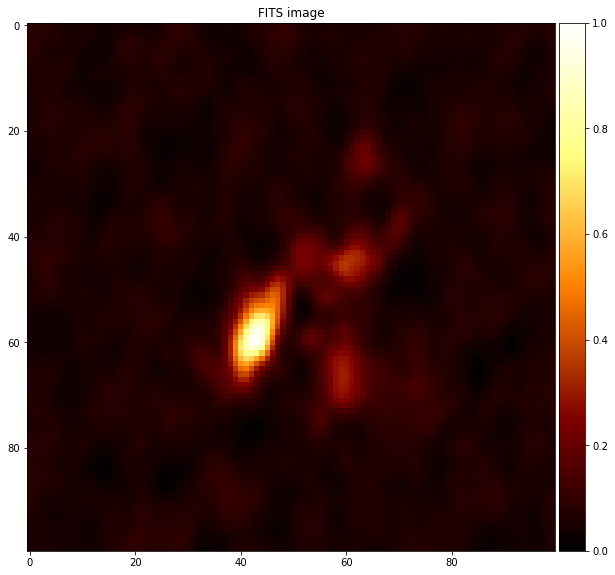

In [9]:
"""
Loading data
"""

fits_path = '../data/images/Orion.cont.image.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

In [10]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

/Users/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


<function graph.thresholded_image_plot>

In [4]:
# common parameters
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

elm_list = list()

for Nc in range(50, 501, 25):
    # number of points of each type
    Nb = int(Nc*0.2)
    Ne = 4*Nc-Nb
    
    # points generation
    center_points = random_centers_generation(data, Nc, base_level=base_level, power=5.)
    collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
    boundary_points = boundary_points_generation(data, base_level, Nb)
    
    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]
    
#    # visualizing the choosen points
#    points_plot(data, center_points=center_points, title="Center Points")
#    points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    #c0, sig0 = estimate_initial_guess(center_points, f, R=0.009, method='mean_dist')
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')
    #c0, sig0 = _estimate_initial_guess(dfunc, data, center_points, base_level)


#    solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#    params_plot(c0, sig0, xc, yc)
#    params_distribution_plot(c0, sig0)
    elm_list.append(ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0., b=0., d1psi1=d1psi, 
                    d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.))

##########################################################################################
Processing 50 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 20100.
nfev: 20110

Residual stats:
Residual RMS: 0.029618199993496908
Residual Variance: 0.0008482265278975671
Flux Lost: 0.06016597847728417
Flux Addition: 0.03495797405969221
psi1(u-f): 0.1006549426809918
Exceeded Pixels: 415
Sharpness: 3.5700778682209022
psi2(grad u): 0.0436768819248349
Total elapsed time: 5.205909490585327 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2298127060825753
Mean min distance between collocation and center point

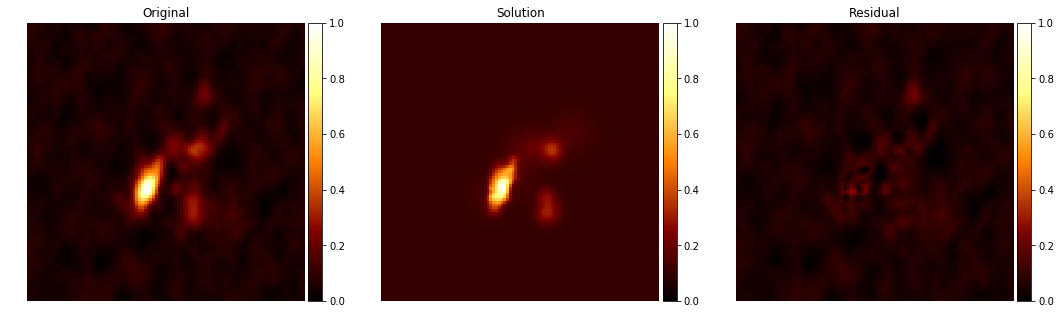

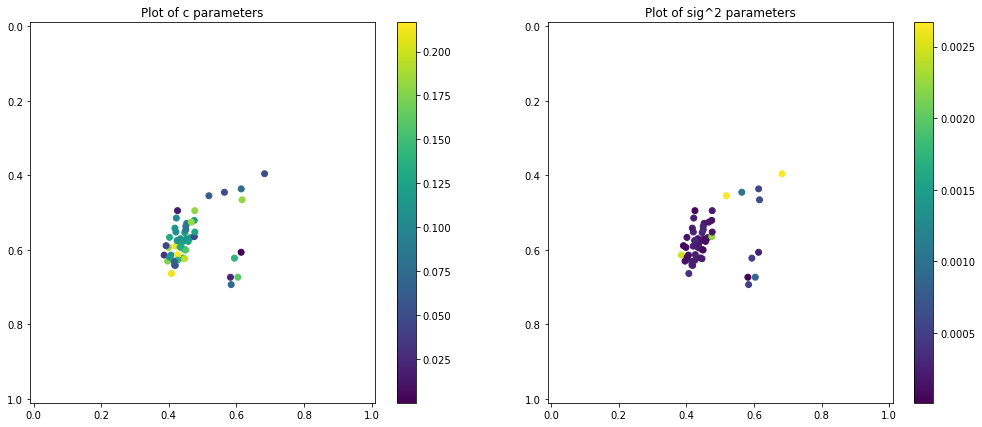

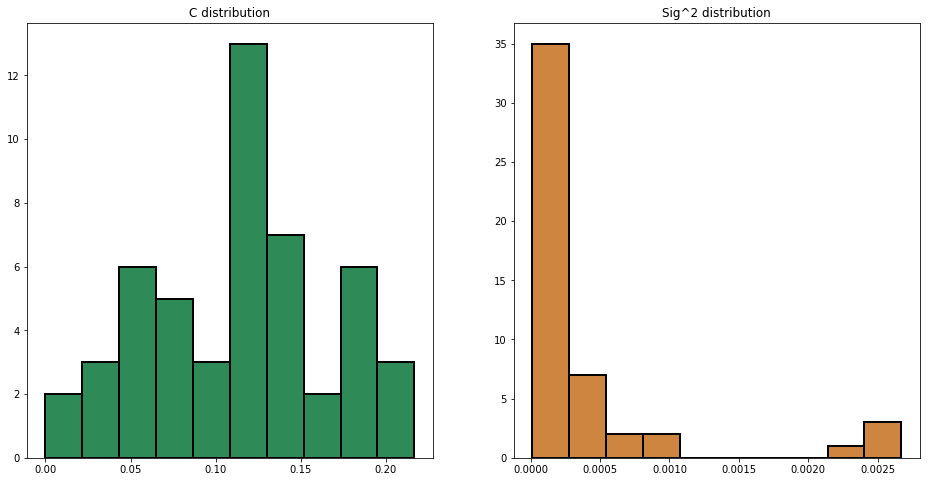

##########################################################################################
Processing 75 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 30100.
nfev: 30115

Residual stats:
Residual RMS: 0.019861655602526875
Residual Variance: 0.0003808561412836941
Flux Lost: 0.03825586290200076
Flux Addition: 0.020977967884143328
psi1(u-f): 0.01892936928287351
Exceeded Pixels: 429
Sharpness: 3.7059706079089807
psi2(grad u): 0.027989633707916937
Total elapsed time: 12.372012615203857 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.24032527821467717
Mean min distance between collocation and center

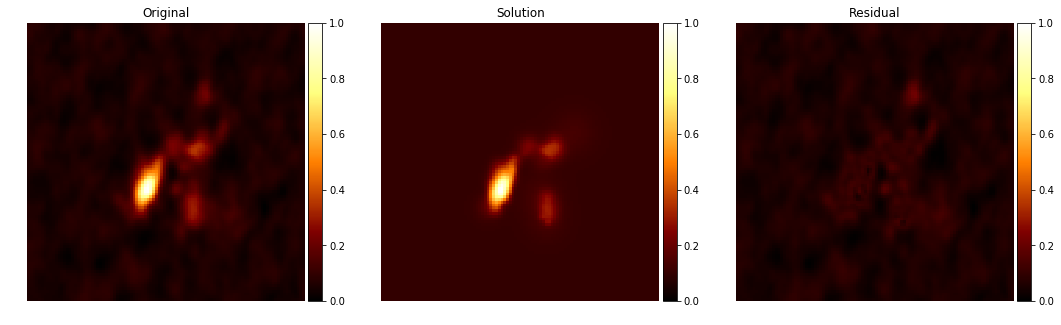

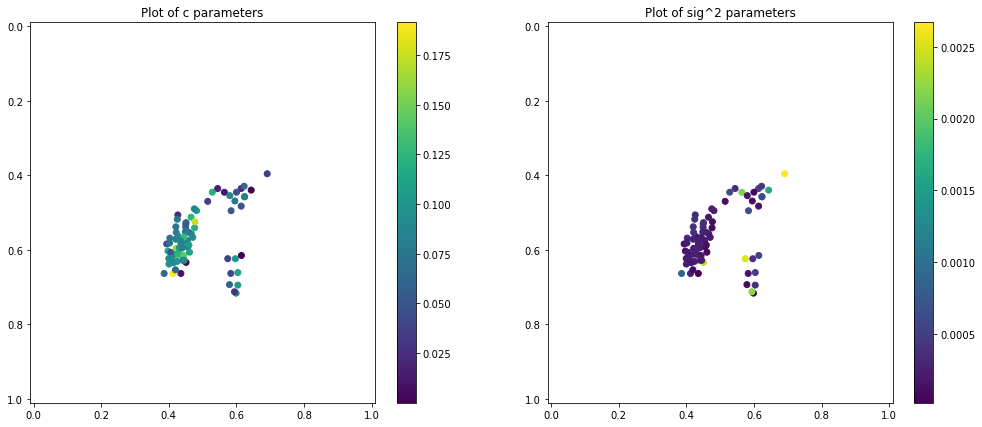

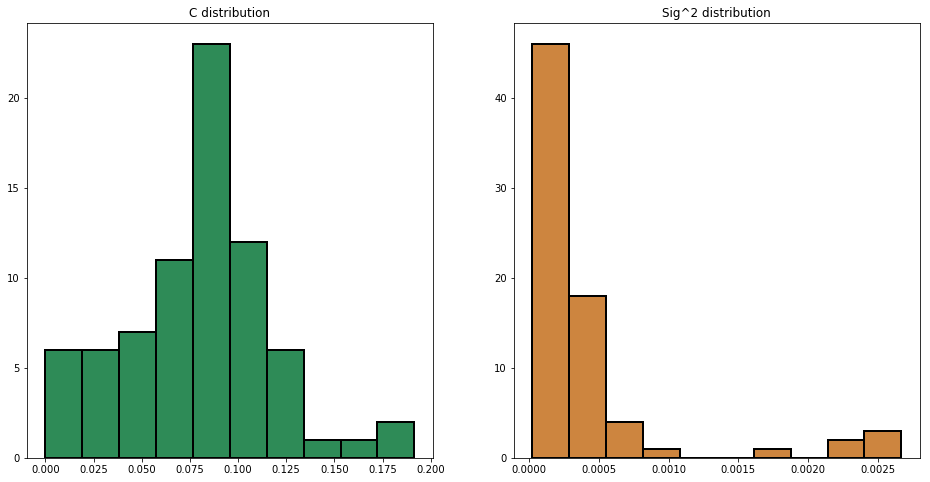

##########################################################################################
Processing 100 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 40100.
nfev: 40113

Residual stats:
Residual RMS: 0.012748845993896639
Residual Variance: 0.00015981720496204013
Flux Lost: 0.02513821009161214
Flux Addition: 0.01742545174723442
psi1(u-f): 0.01156862317368647
Exceeded Pixels: 444
Sharpness: 3.741754567026259
psi2(grad u): 0.028313098621651767
Total elapsed time: 23.684714317321777 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2402246971954528
Mean min distance between collocation and center 

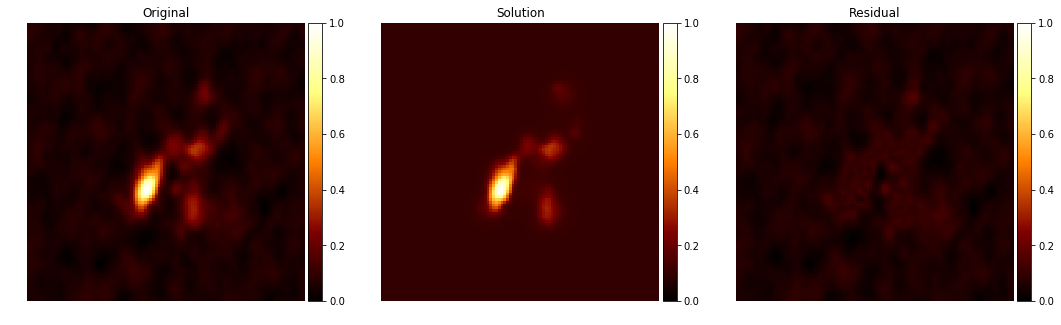

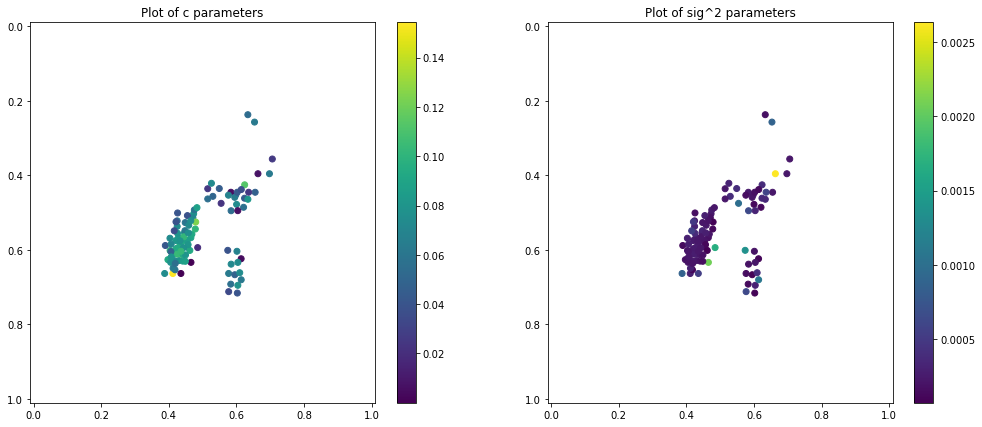

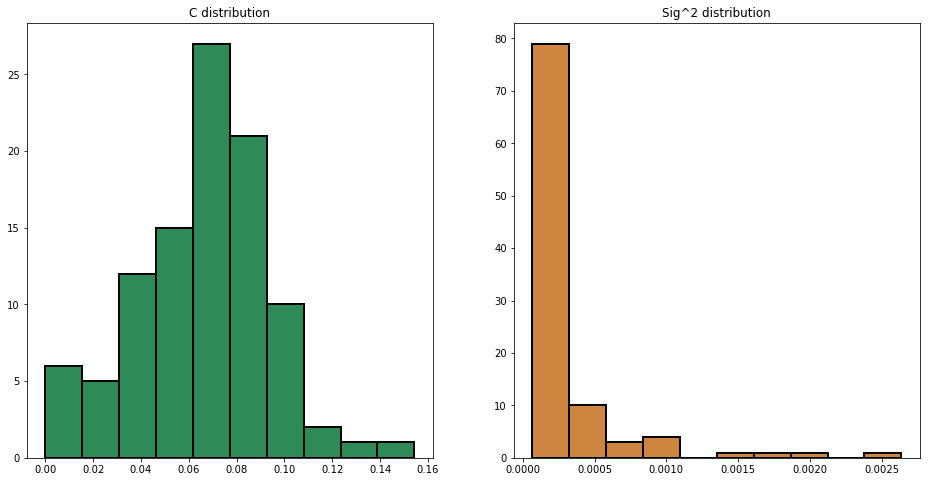

##########################################################################################
Processing 125 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 50100.
nfev: 50114

Residual stats:
Residual RMS: 0.011052121053731805
Residual Variance: 0.00012023113349156143
Flux Lost: 0.020794160148026854
Flux Addition: 0.014312183199795233
psi1(u-f): 0.00964798672423045
Exceeded Pixels: 451
Sharpness: 3.6843114016519314
psi2(grad u): 0.026096249293459804
Total elapsed time: 40.96477746963501 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2106608573965594
Mean min distance between collocation and cente

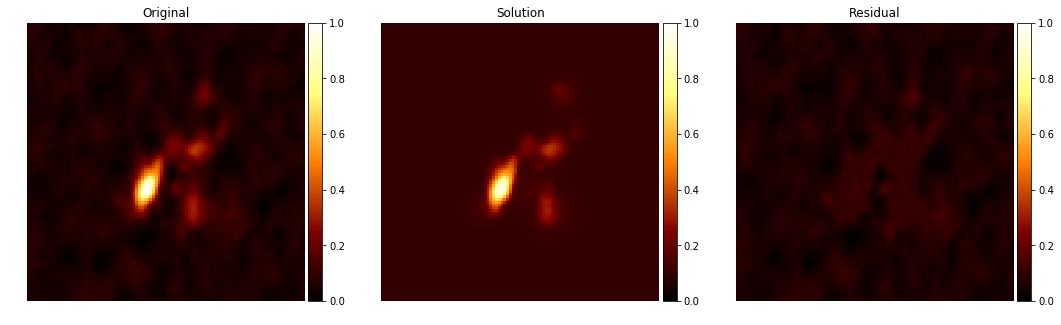

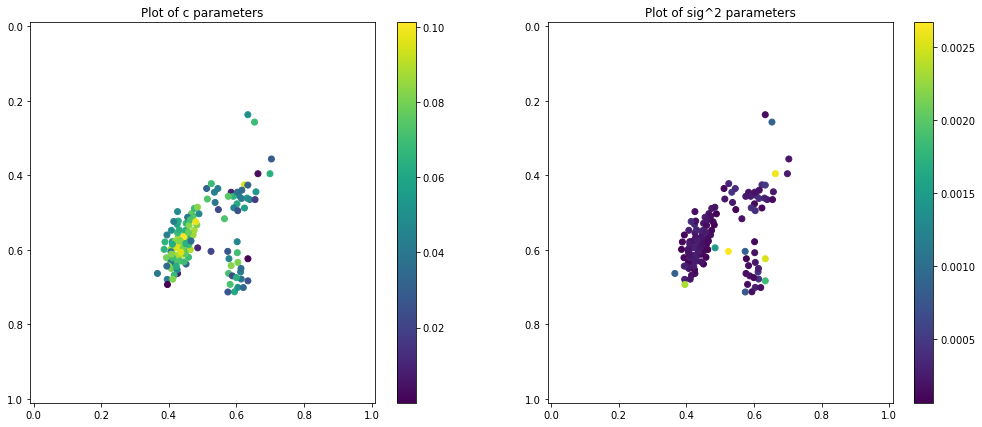

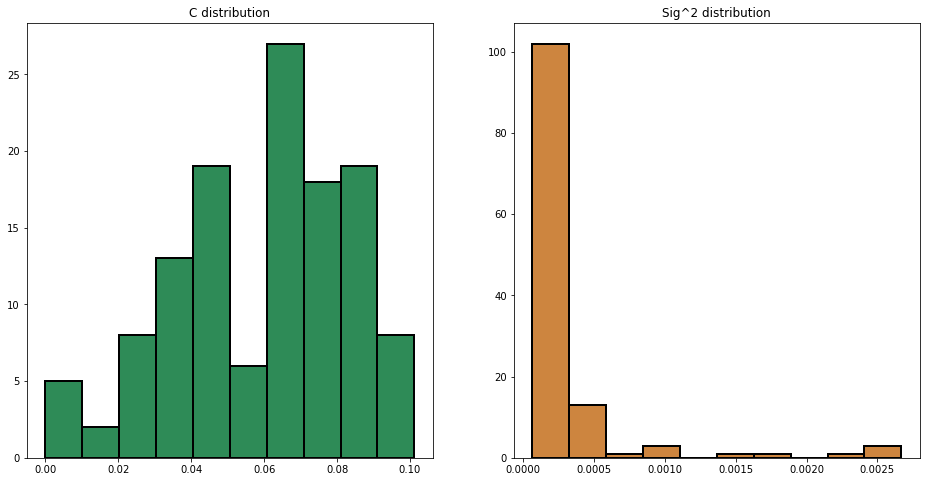

##########################################################################################
Processing 150 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 60100.
nfev: 60112

Residual stats:
Residual RMS: 0.008065827479539
Residual Variance: 6.339148939658081e-05
Flux Lost: 0.016201689499592838
Flux Addition: 0.010160761156119117
psi1(u-f): 0.0026629875026356426
Exceeded Pixels: 420
Sharpness: 3.76118121916548
psi2(grad u): 0.025184965219466005
Total elapsed time: 62.24803566932678 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.15289132594403468
Mean min distance between collocation and center p

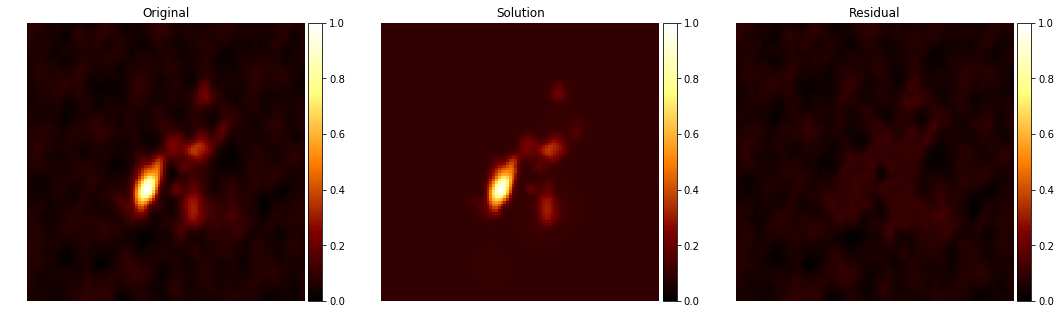

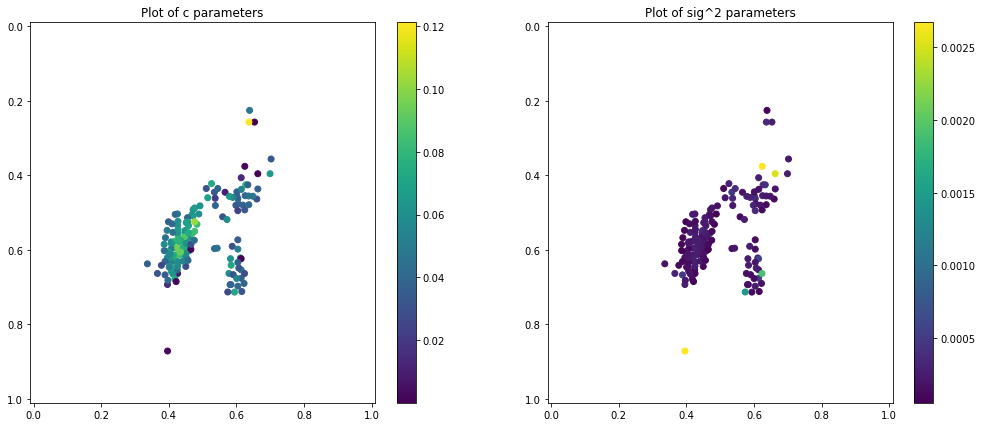

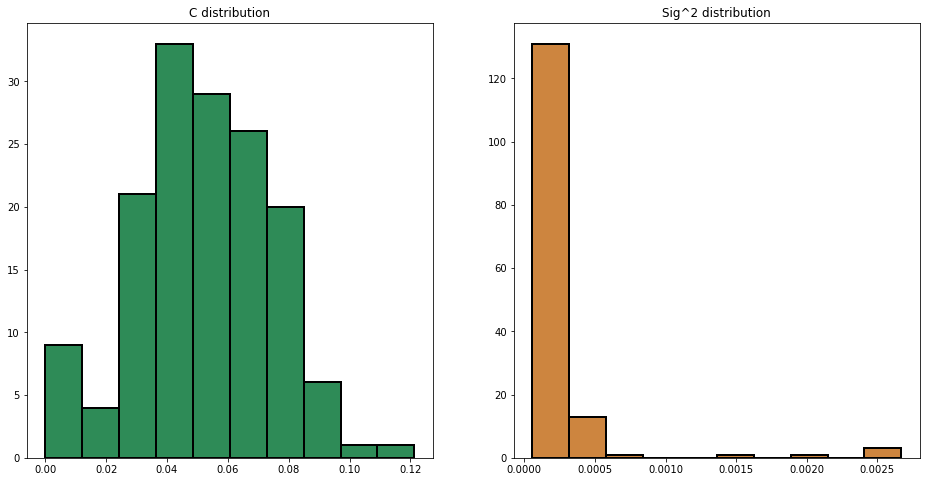

##########################################################################################
Processing 175 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 70100.
nfev: 70115

Residual stats:
Residual RMS: 0.006741062623034954
Residual Variance: 4.462841533483177e-05
Flux Lost: 0.013028105097320912
Flux Addition: 0.008806897281890283
psi1(u-f): 0.0016223521442555596
Exceeded Pixels: 430
Sharpness: 3.7790671375590805
psi2(grad u): 0.025270451336167447
Total elapsed time: 95.2711832523346 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.14718233311168308
Mean min distance between collocation and cent

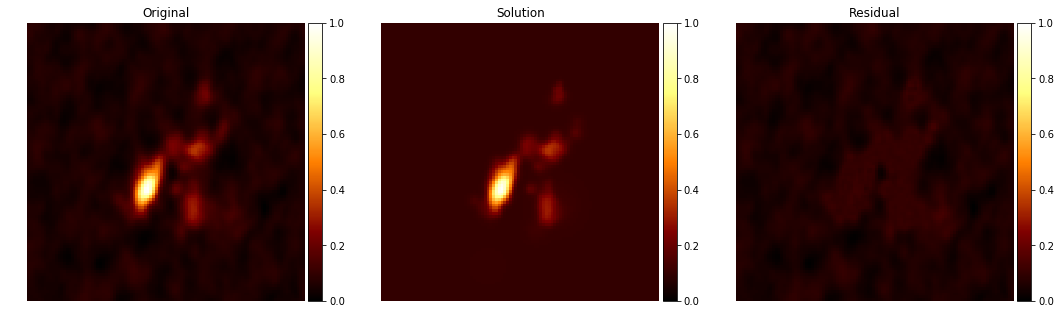

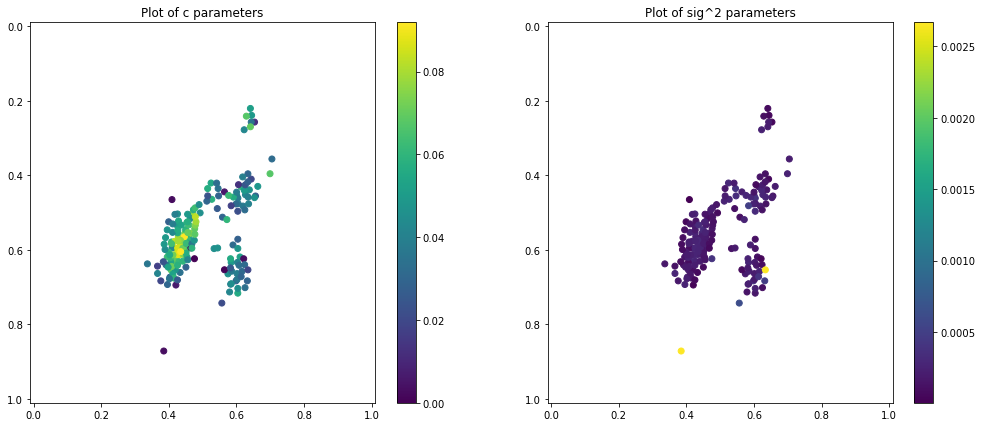

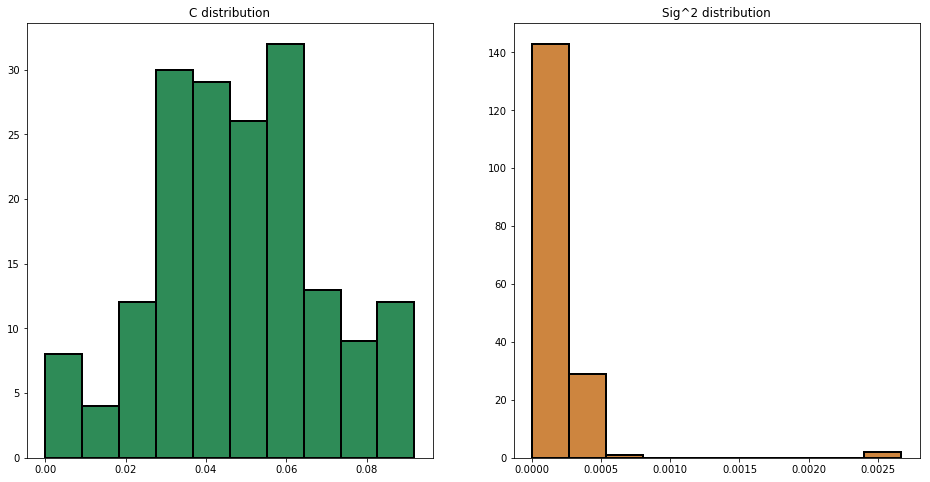

##########################################################################################
Processing 200 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80112

Residual stats:
Residual RMS: 0.005517101713154324
Residual Variance: 2.9987495468062936e-05
Flux Lost: 0.010778565264034127
Flux Addition: 0.007635864388128916
psi1(u-f): 0.0008741472872445219
Exceeded Pixels: 446
Sharpness: 3.7951036440305783
psi2(grad u): 0.02511799903703794
Total elapsed time: 136.04044651985168 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.09474747607370504
Mean min distance between collocation and ce

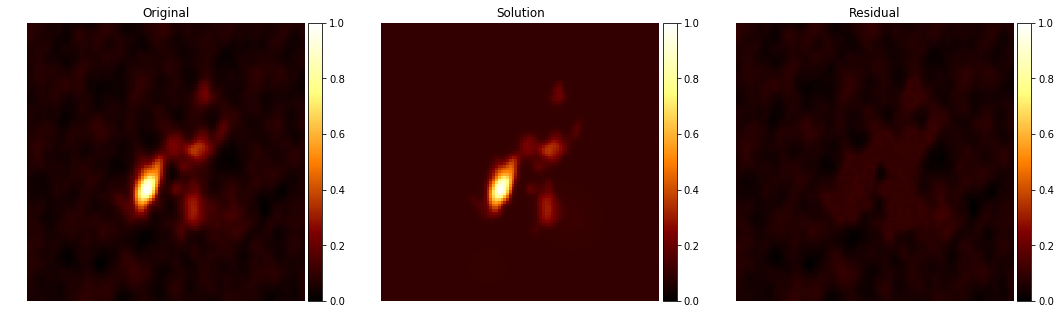

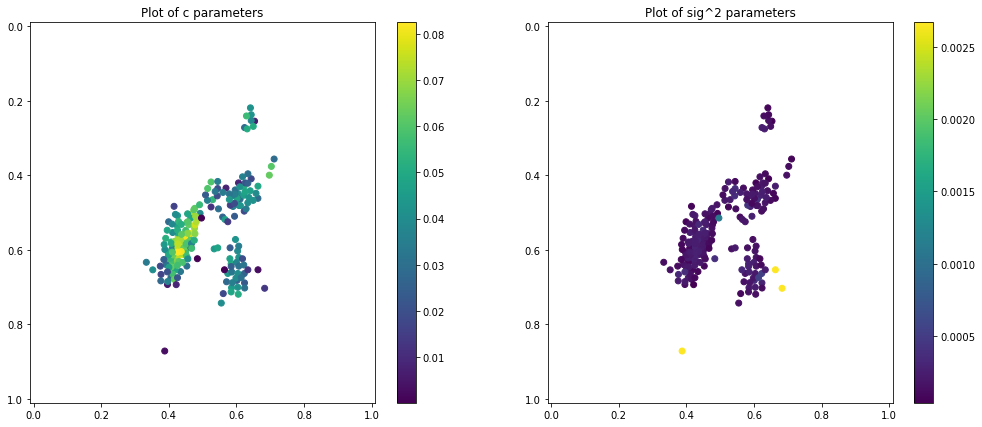

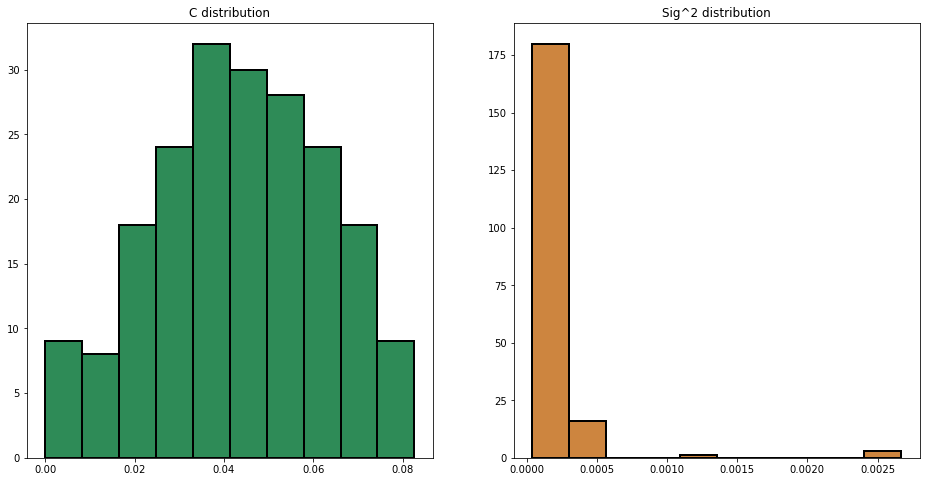

##########################################################################################
Processing 225 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 90100.
nfev: 90114

Residual stats:
Residual RMS: 0.0056236467784378345
Residual Variance: 3.1221903936778204e-05
Flux Lost: 0.01065013463126027
Flux Addition: 0.007677259888406355
psi1(u-f): 0.0010049657785071741
Exceeded Pixels: 447
Sharpness: 3.7996153005899376
psi2(grad u): 0.025065490681598183
Total elapsed time: 187.97116780281067 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.09478474877837473
Mean min distance between collocation and c

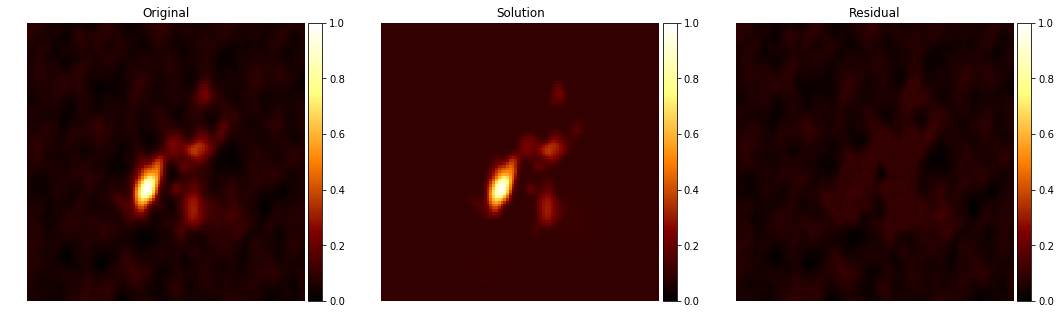

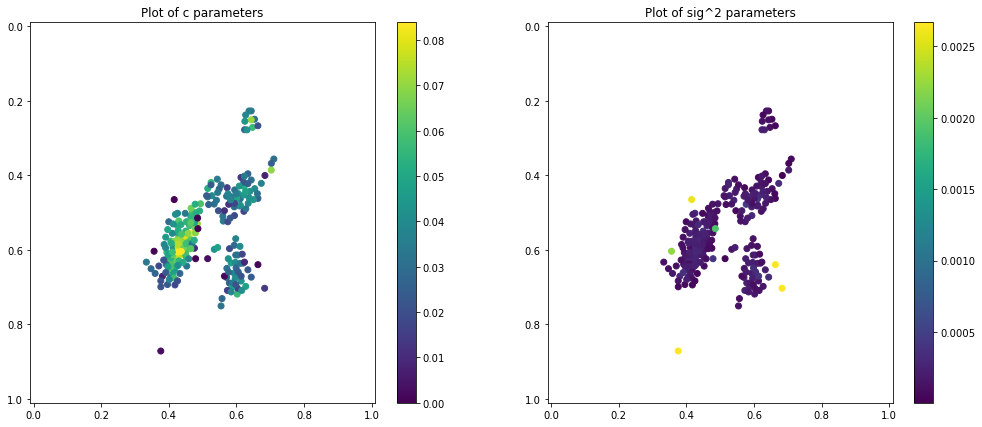

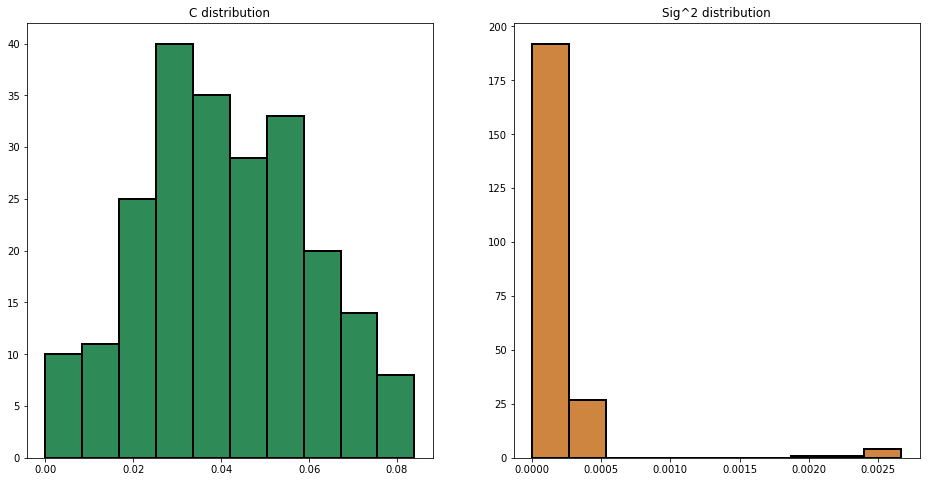

##########################################################################################
Processing 250 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100111

Residual stats:
Residual RMS: 0.00511319319170402
Residual Variance: 2.5774563420162248e-05
Flux Lost: 0.00979200863800837
Flux Addition: 0.006944516884199983
psi1(u-f): 0.0007234862753125441
Exceeded Pixels: 439
Sharpness: 3.7991330946023196
psi2(grad u): 0.02489058745821097
Total elapsed time: 264.1541647911072 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.09472992307945256
Mean min distance between collocation and cen

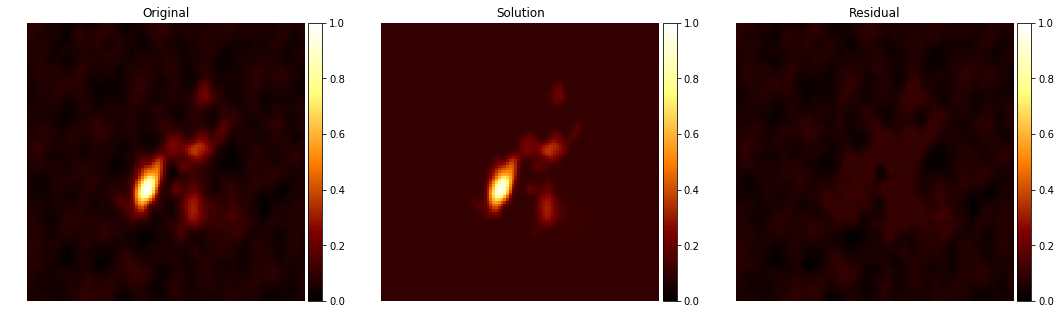

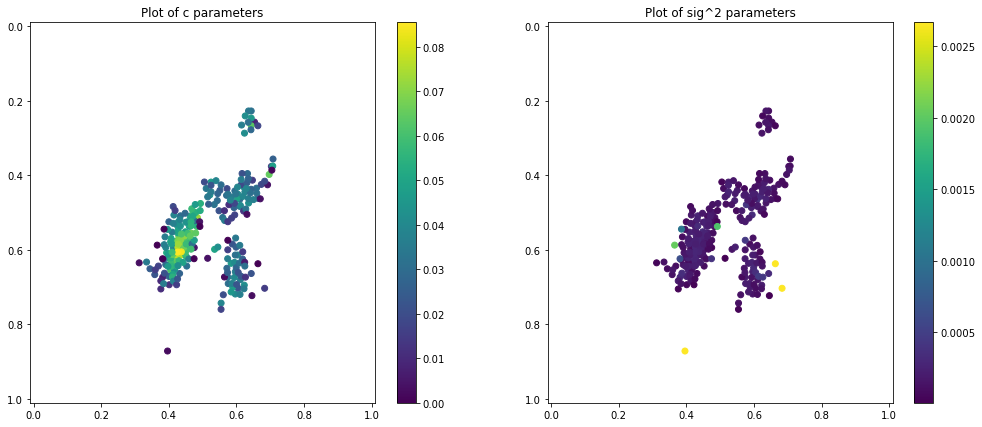

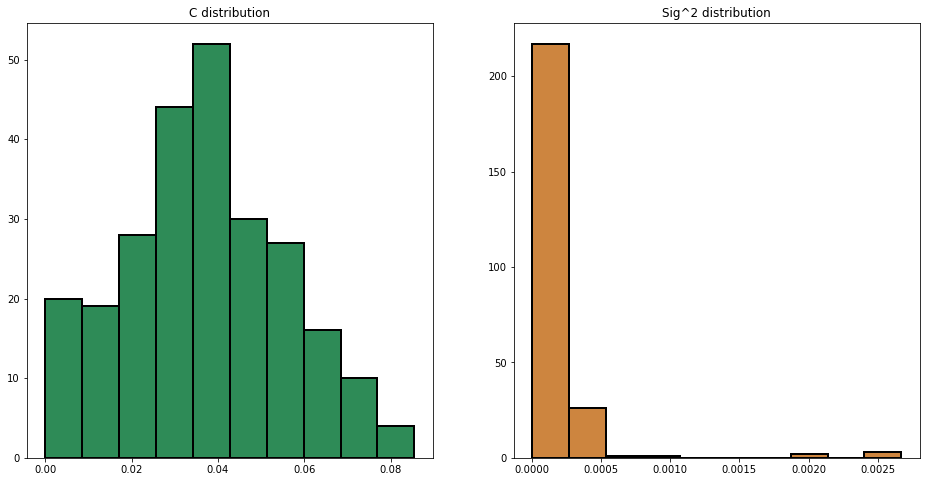

##########################################################################################
Processing 275 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 110100.
nfev: 110118

Residual stats:
Residual RMS: 0.004865896800296091
Residual Variance: 2.3370528038507042e-05
Flux Lost: 0.00926096715842725
Flux Addition: 0.006670271325147584
psi1(u-f): 0.0006322451468642792
Exceeded Pixels: 441
Sharpness: 3.803473300814438
psi2(grad u): 0.024802050905644676
Total elapsed time: 389.51321959495544 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.10714780963236546
Mean min distance between collocation and c

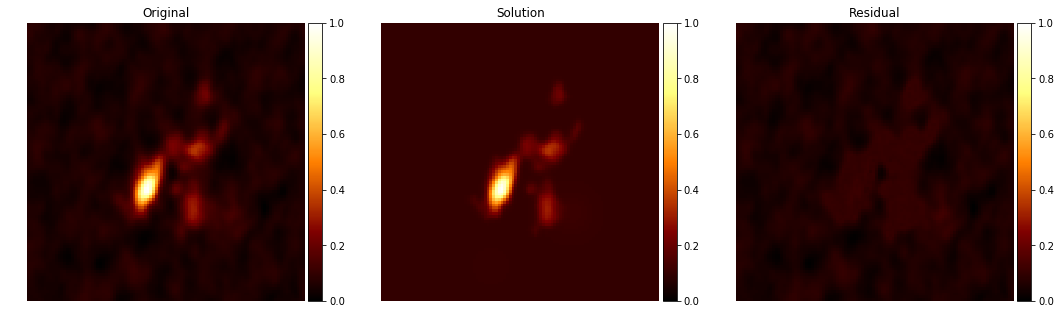

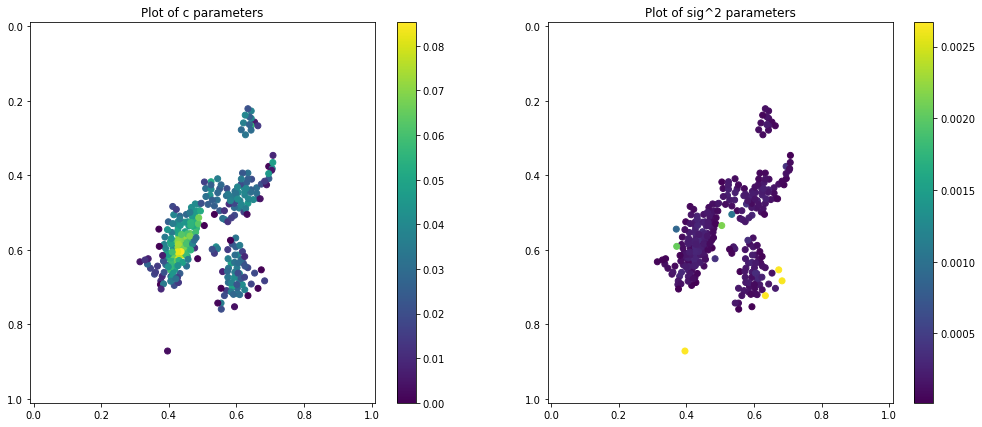

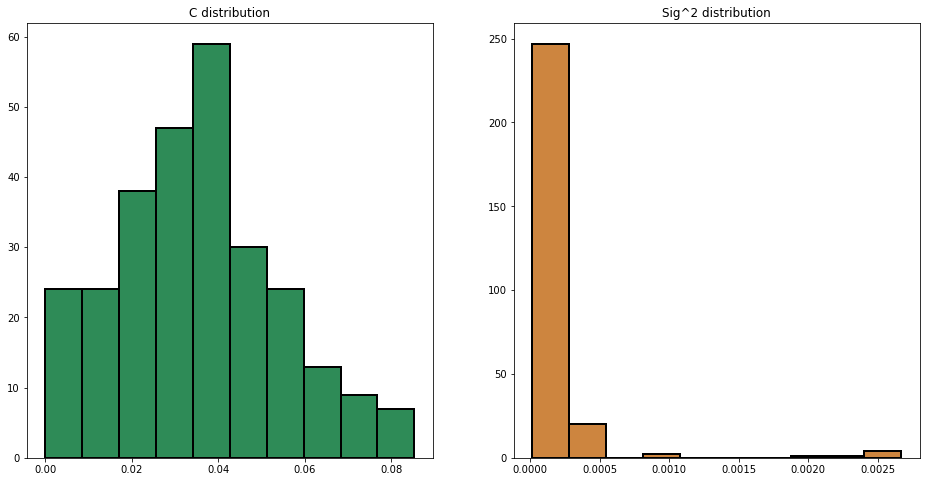

##########################################################################################
Processing 300 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.00424334205943393
Residual Variance: 1.7806017724592886e-05
Flux Lost: 0.008175659960295881
Flux Addition: 0.006082999619764495
psi1(u-f): 0.0005603215867679048
Exceeded Pixels: 441
Sharpness: 3.807504495613948
psi2(grad u): 0.024909865700774095
Total elapsed time: 505.51843309402466 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0647170803654014
Mean min distance between collocation and ce

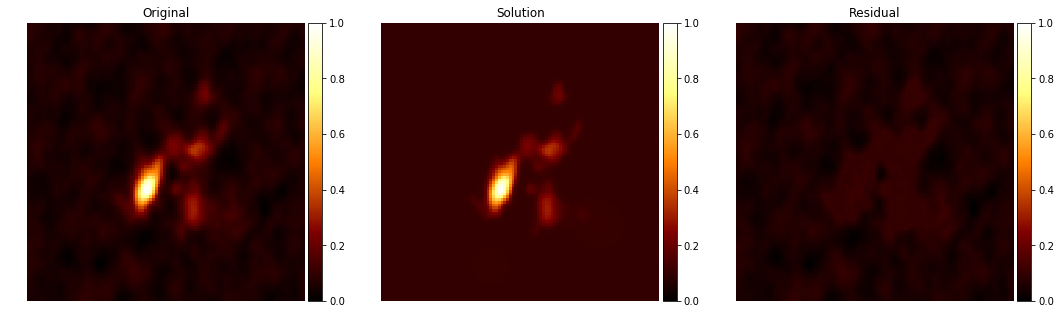

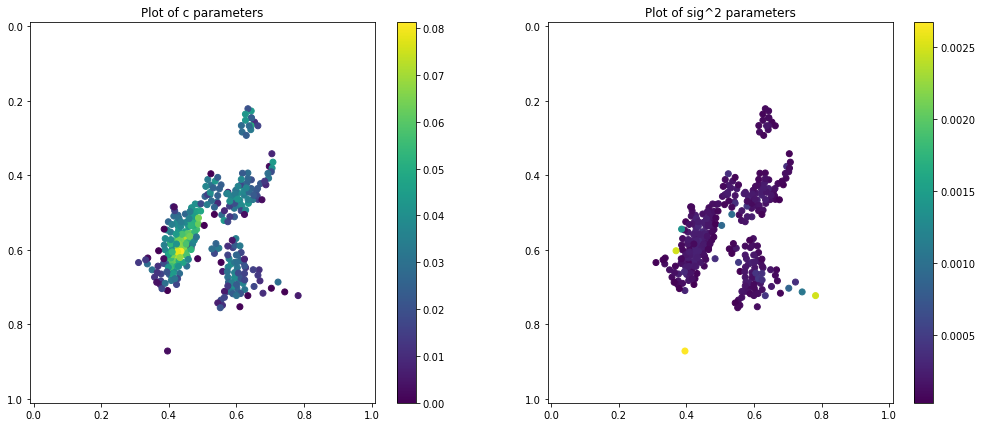

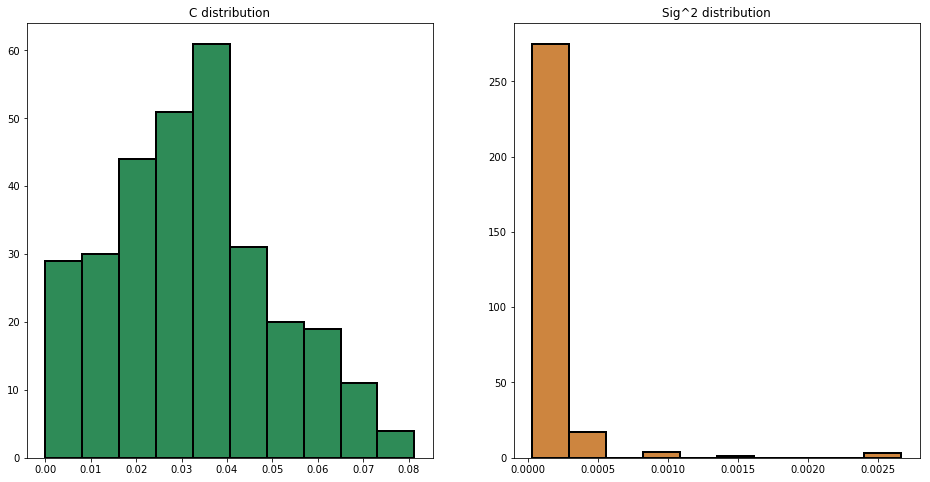

##########################################################################################
Processing 325 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 130100.
nfev: 130108

Residual stats:
Residual RMS: 0.003768255893143775
Residual Variance: 1.3843695382376655e-05
Flux Lost: 0.007656272783122881
Flux Addition: 0.004863631720053675
psi1(u-f): 0.00028626284417212957
Exceeded Pixels: 434
Sharpness: 3.826358437148785
psi2(grad u): 0.024982133102540254
Total elapsed time: 615.9653725624084 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.05032597349365657
Mean min distance between collocation and 

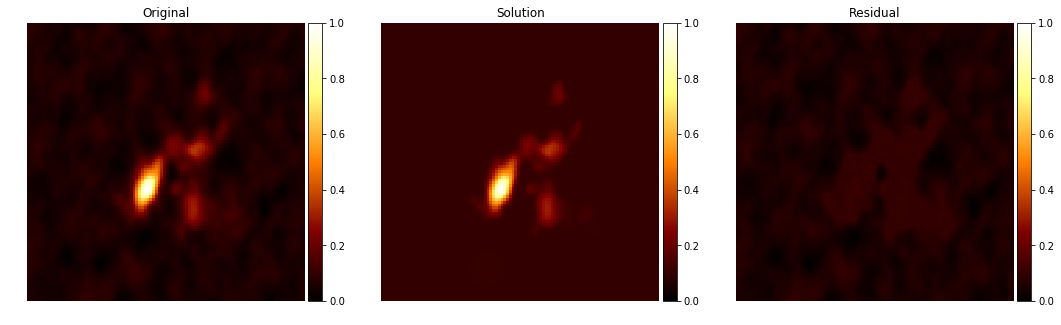

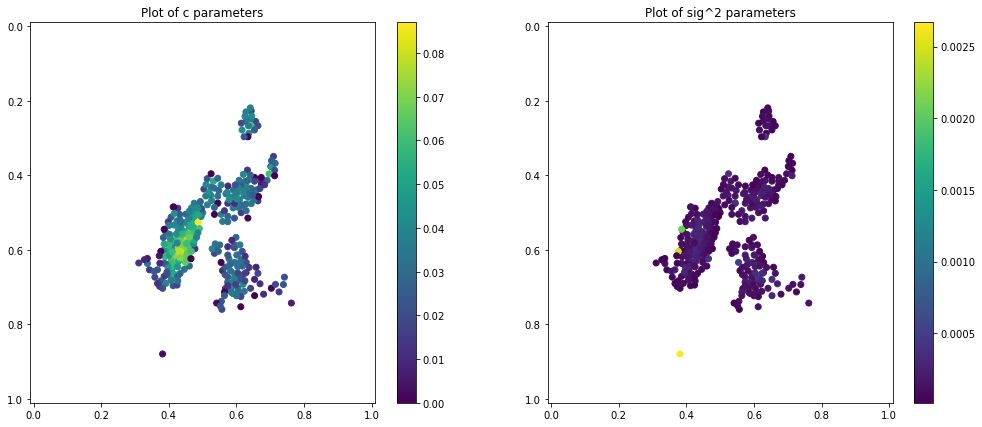

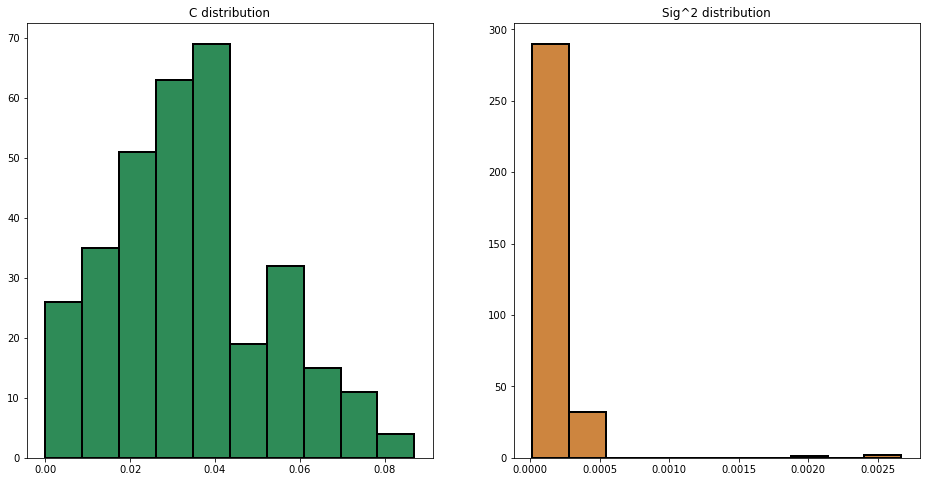

##########################################################################################
Processing 350 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 140100.
nfev: 140110

Residual stats:
Residual RMS: 0.0037676652658802504
Residual Variance: 1.396240034551339e-05
Flux Lost: 0.0073237524687268995
Flux Addition: 0.005065142862995325
psi1(u-f): 0.00033791891244575837
Exceeded Pixels: 442
Sharpness: 3.8291339517171292
psi2(grad u): 0.025083434850644213
Total elapsed time: 743.8643956184387 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03299309909211285
Mean min distance between collocation an

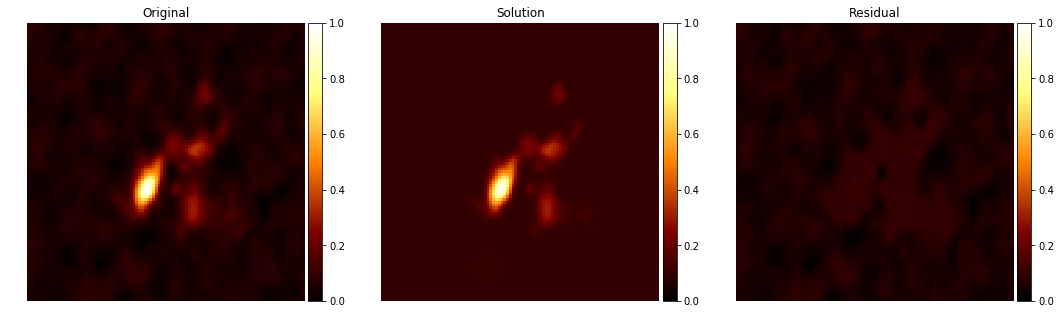

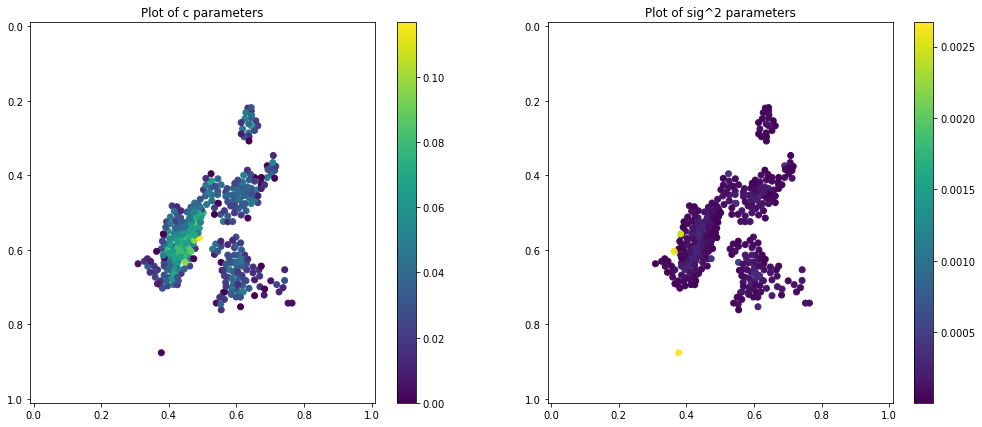

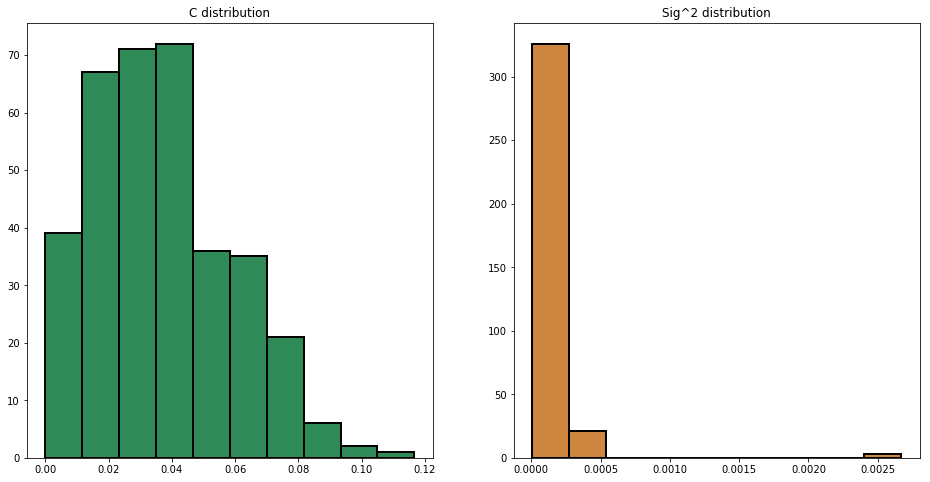

##########################################################################################
Processing 375 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 150100.
nfev: 150117

Residual stats:
Residual RMS: 0.0037270486089744518
Residual Variance: 1.3601100384893094e-05
Flux Lost: 0.007330199830487174
Flux Addition: 0.004810796456734656
psi1(u-f): 0.00035021531718816155
Exceeded Pixels: 430
Sharpness: 3.8281183031675083
psi2(grad u): 0.024997677562312484
Total elapsed time: 953.6063992977142 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.027389609692208397
Mean min distance between collocation a

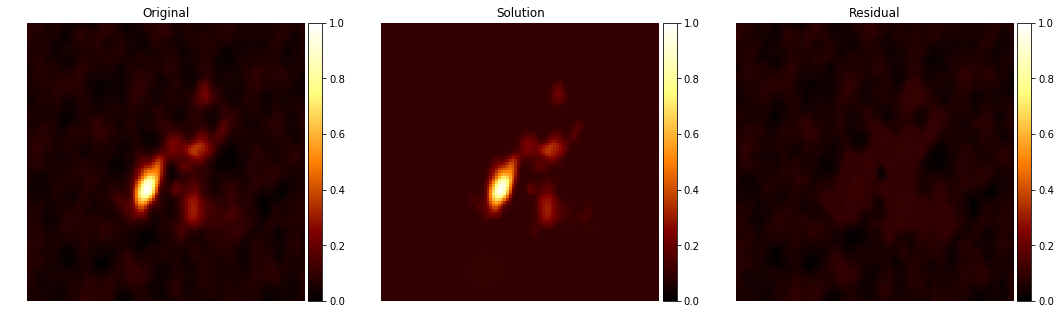

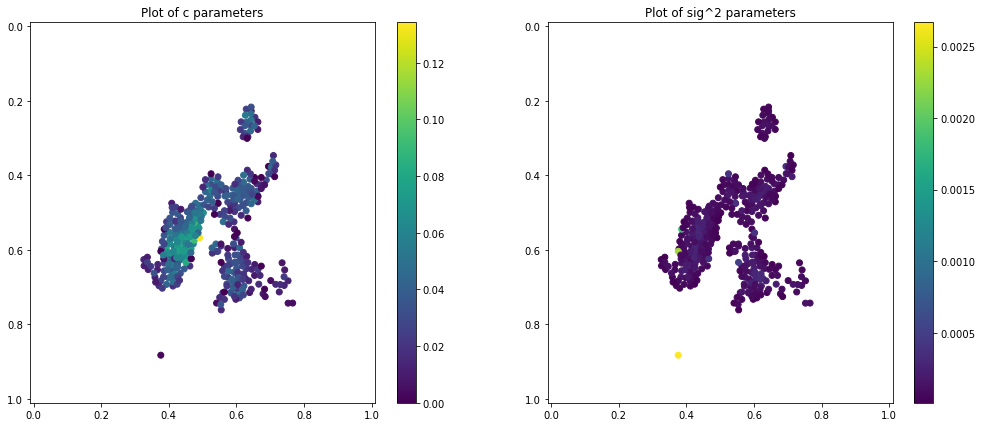

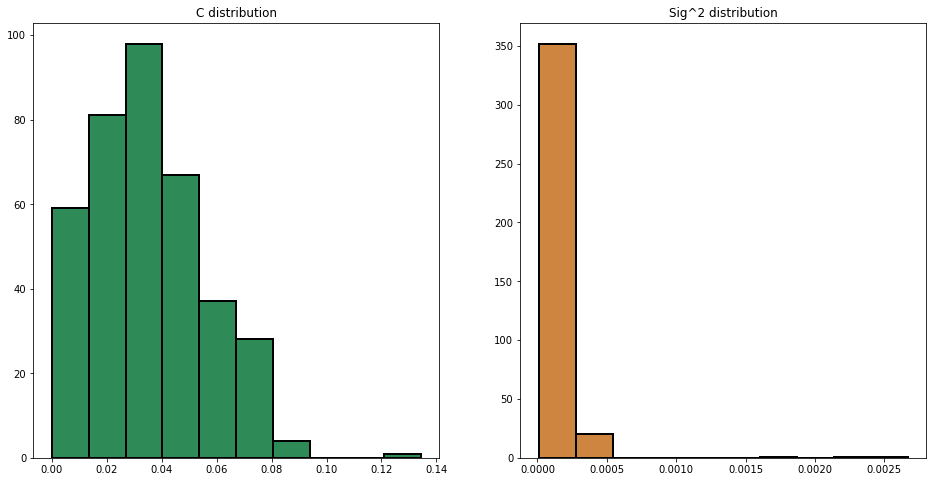

##########################################################################################
Processing 400 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 160100.
nfev: 160112

Residual stats:
Residual RMS: 0.003606600193537068
Residual Variance: 1.2742447436935079e-05
Flux Lost: 0.0071098604687284865
Flux Addition: 0.0047000964705044
psi1(u-f): 0.00024566320501487164
Exceeded Pixels: 440
Sharpness: 3.8267250732055067
psi2(grad u): 0.024904029893715124
Total elapsed time: 1094.6626460552216 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03371234683390308
Mean min distance between collocation and

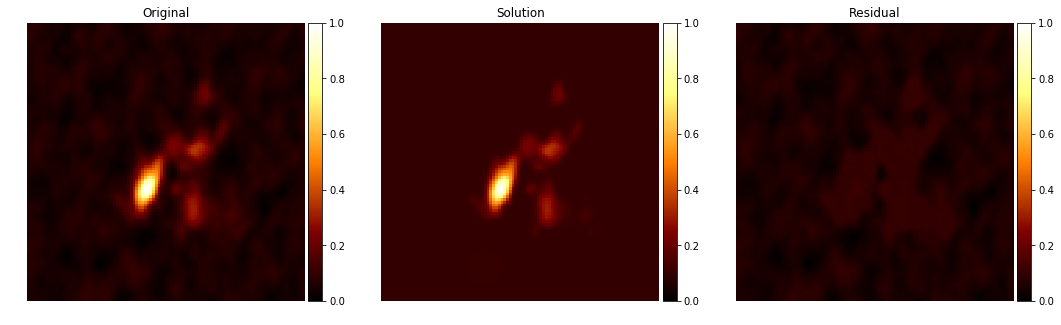

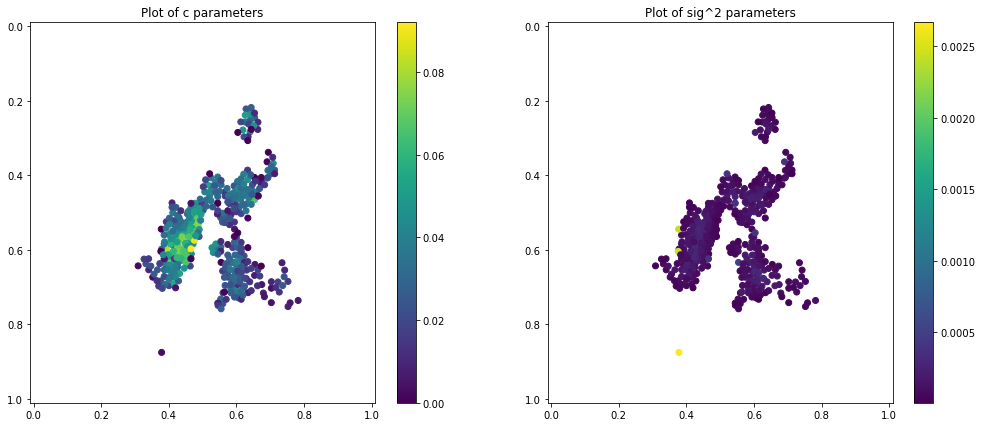

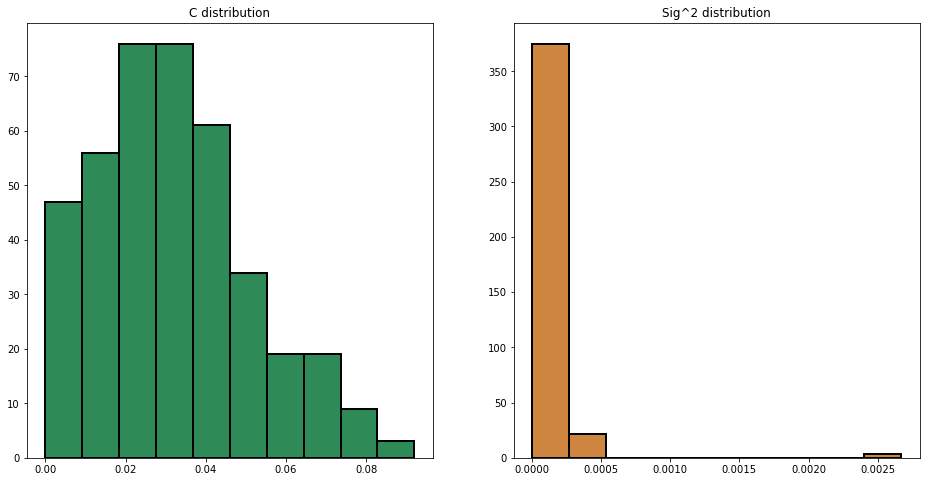

##########################################################################################
Processing 425 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 170100.
nfev: 170114

Residual stats:
Residual RMS: 0.0037194826499902973
Residual Variance: 1.3613002667805674e-05
Flux Lost: 0.0070137074306856504
Flux Addition: 0.004810833108161412
psi1(u-f): 0.0003219493835420384
Exceeded Pixels: 446
Sharpness: 3.82919295594448
psi2(grad u): 0.02492989047106803
Total elapsed time: 1331.1680691242218 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.024513627177532037
Mean min distance between collocation and

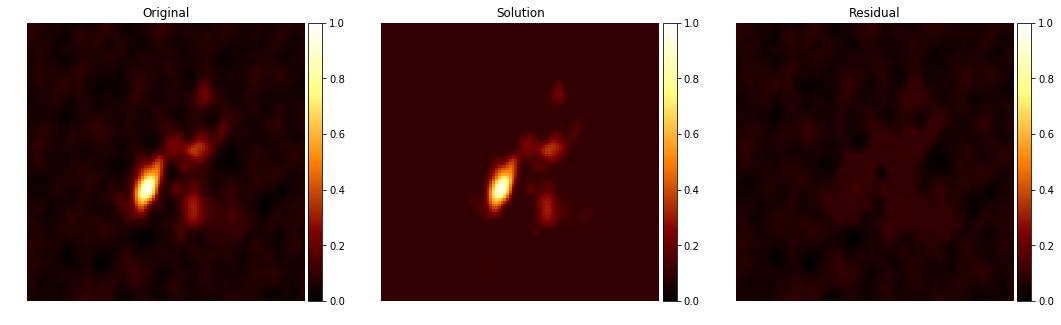

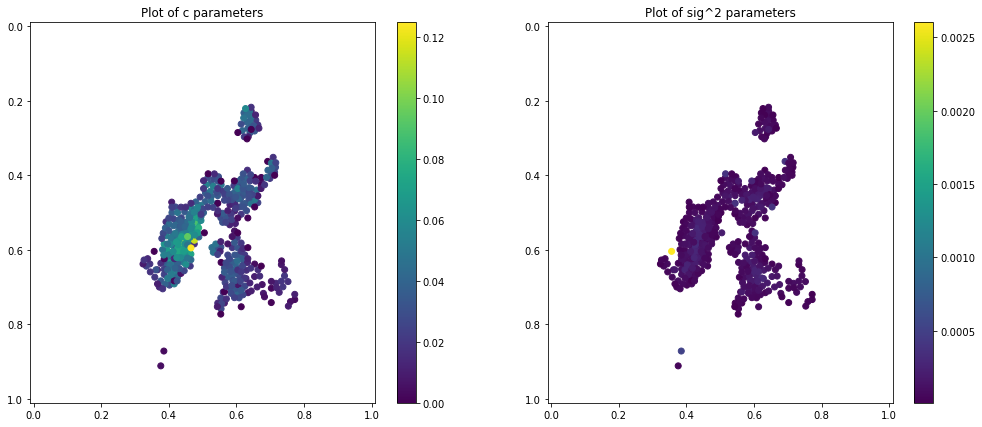

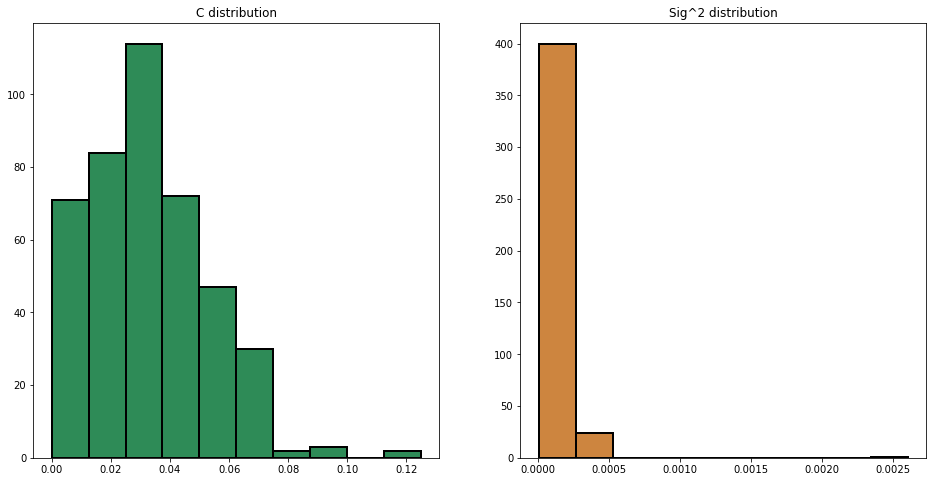

##########################################################################################
Processing 450 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 180100.
nfev: 180122

Residual stats:
Residual RMS: 0.003501894304081153
Residual Variance: 1.1989697084504328e-05
Flux Lost: 0.006834047231504209
Flux Addition: 0.004386185626518239
psi1(u-f): 0.0002549463204439411
Exceeded Pixels: 431
Sharpness: 3.829070780838169
psi2(grad u): 0.024881855808049358
Total elapsed time: 1598.7608246803284 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.01966971116555874
Mean min distance between collocation and 

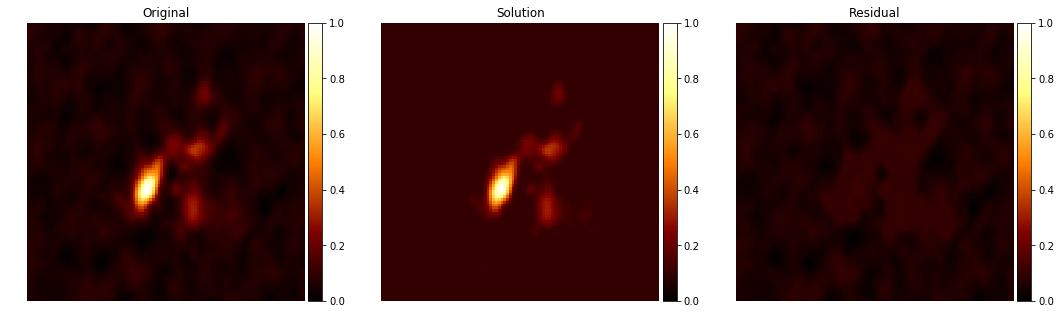

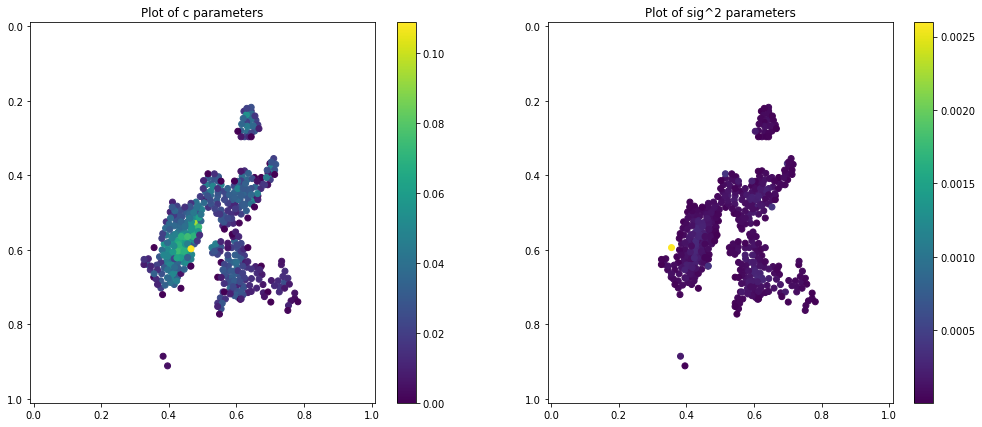

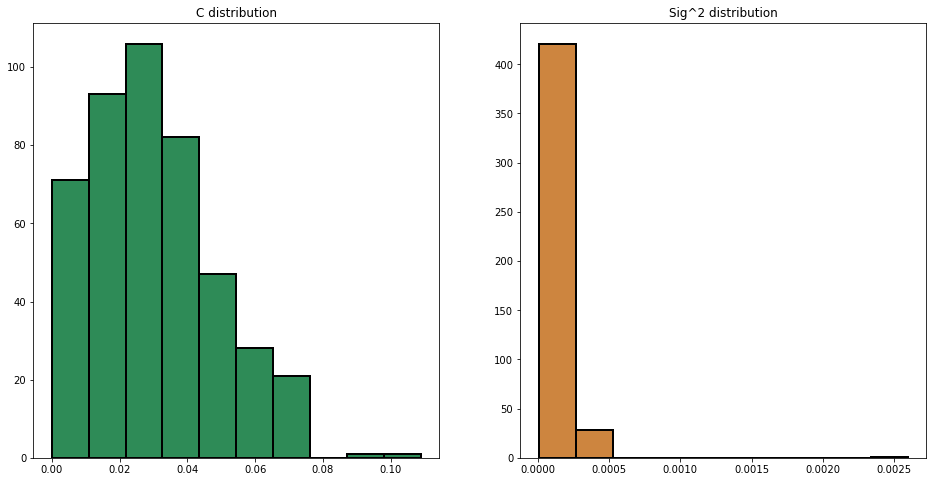

##########################################################################################
Processing 475 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 190100.
nfev: 190110

Residual stats:
Residual RMS: 0.0035003948693741716
Residual Variance: 1.1991912333520538e-05
Flux Lost: 0.006876501993180472
Flux Addition: 0.0044862025676938
psi1(u-f): 0.000250251502809571
Exceeded Pixels: 433
Sharpness: 3.8310009042986946
psi2(grad u): 0.024885494854428727
Total elapsed time: 1545.2471151351929 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.01997624150534528
Mean min distance between collocation and c

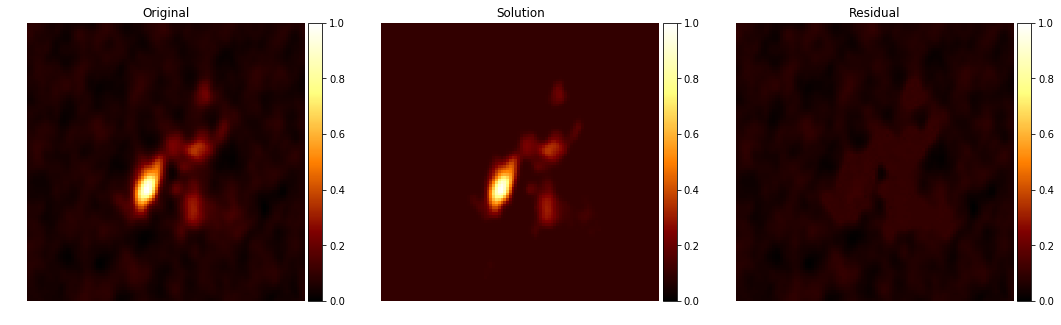

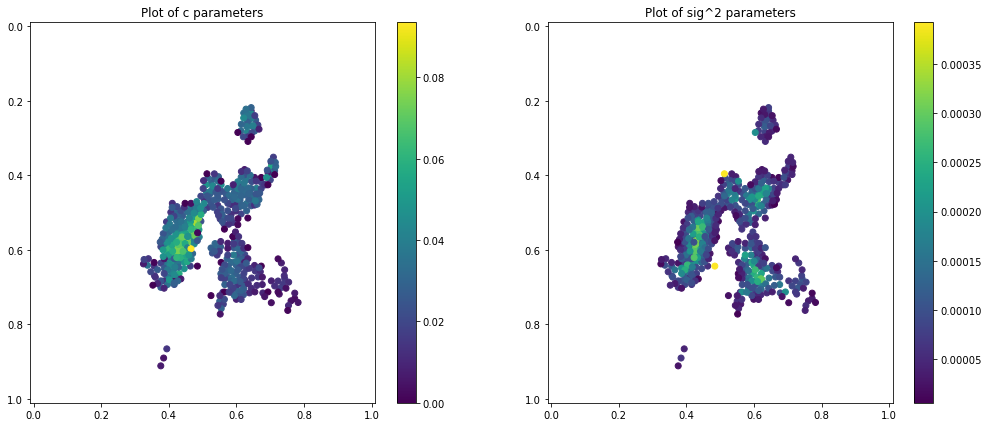

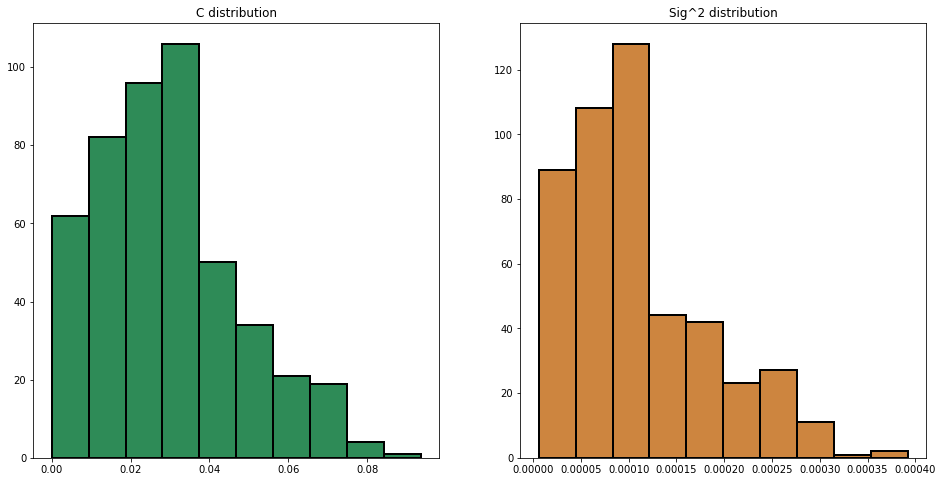

##########################################################################################
Processing 500 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 200100.
nfev: 200110

Residual stats:
Residual RMS: 0.0036721572318509795
Residual Variance: 1.3262588381170074e-05
Flux Lost: 0.00677666623767083
Flux Addition: 0.004570801880644549
psi1(u-f): 0.0007701272385825015
Exceeded Pixels: 435
Sharpness: 3.8220729256177317
psi2(grad u): 0.024470110677387167
Total elapsed time: 1789.245864391327 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.02181456205502078
Mean min distance between collocation and 

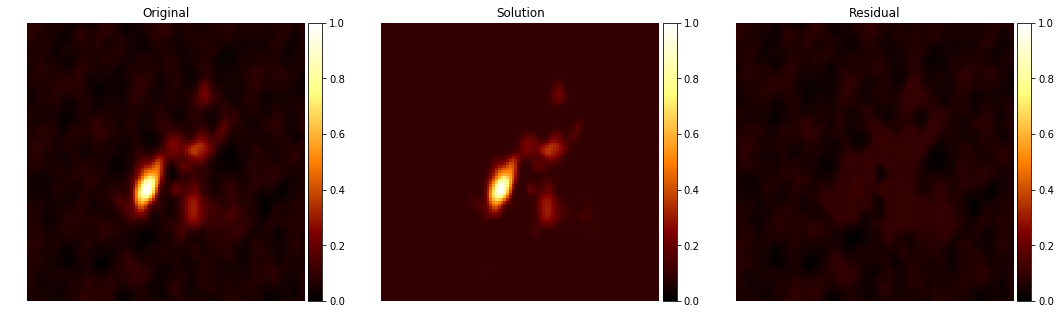

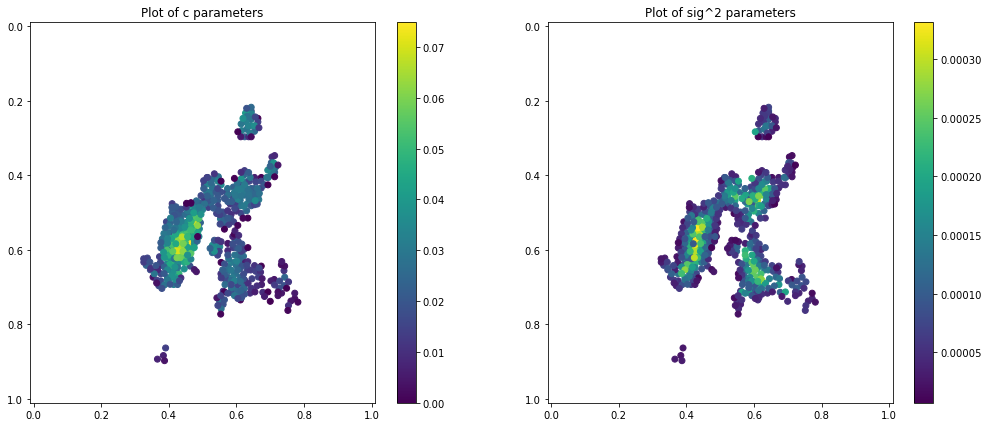

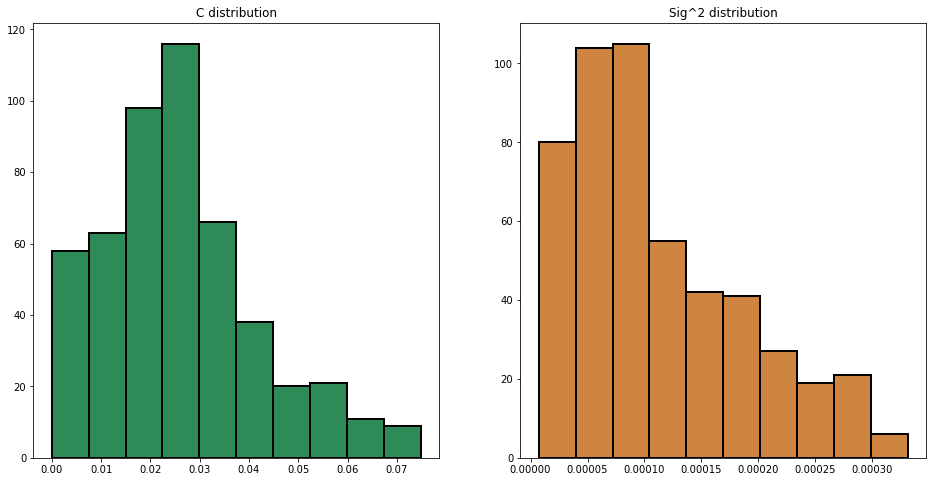

In [5]:
for elm in elm_list:
    print('#'*90)
    print('Processing {0} centers example'.format(len(elm.c)))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    # for memory reasons
    del elm.data; del elm.mask; del elm.dfunc
    
# pickling results
target = open("exp01_orion.pkl", "wb")
pickle.dump(elm_list, target)
target.close()

## Analysis of results in `Orion KL`

In [4]:
elm_list = pickle.load( open('../results/exp01_orion.pkl', 'rb') )

In [5]:
n_center = np.array( [len(elm.c) for elm in elm_list] )
r_stats = [elm.residual_stats for elm in elm_list]

variance = np.array( [var for (var,_,_,_,_,_,_,_,_) in r_stats] )
entropy = np.array( [entr for (_,entr,_,_,_,_,_,_,_) in r_stats] )
rms = np.array( [rms for (_,_,rms,_,_,_,_,_,_) in r_stats] )
flux_addition = np.array( [flux for (_,_,_,flux,_,_,_,_,_) in r_stats] )
flux_lost = np.array( [flux for (_,_,_,_,flux,_,_,_,_) in r_stats] )
psi1_int = np.array( [psi1 for (_,_,_,_,_,psi1,_,_,_) in r_stats] )
npix = np.array( [npix for (_,_,_,_,_,_,npix,_,_) in r_stats] )
sharpness = np.array( [sharp for (_,_,_,_,_,_,_,sharp,_) in r_stats] )
psi2_int = np.array( [psi2 for (_,_,_,_,_,_,_,_,psi2) in r_stats] )

times = np.array([elm.elapsed_time for elm in elm_list])

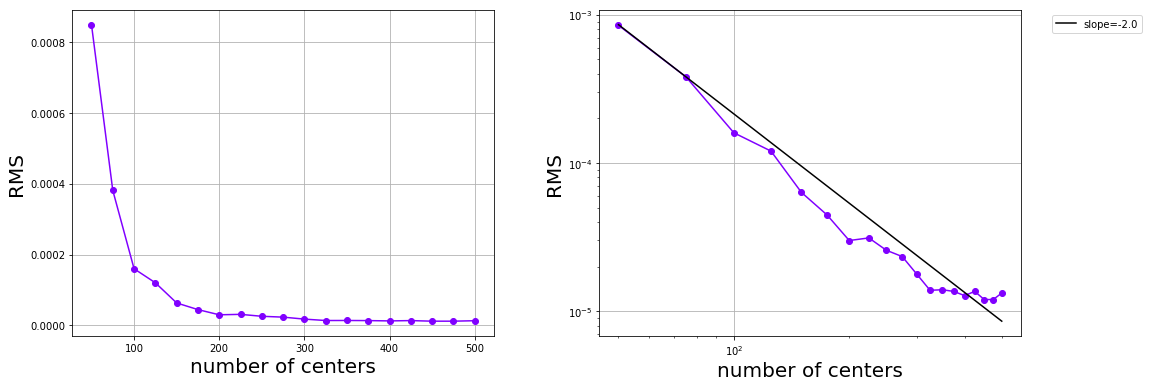

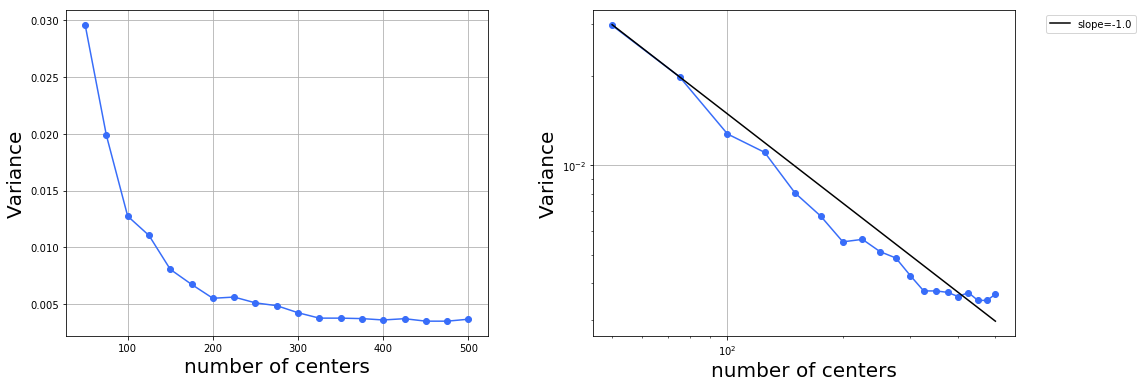

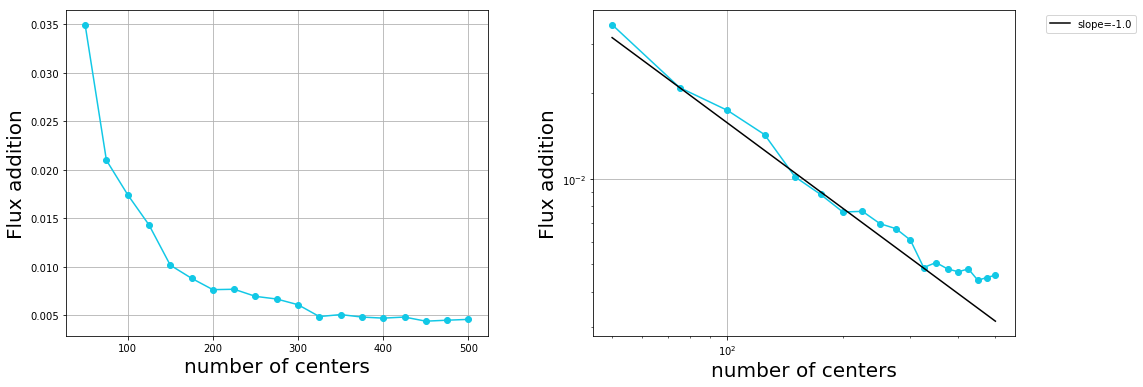

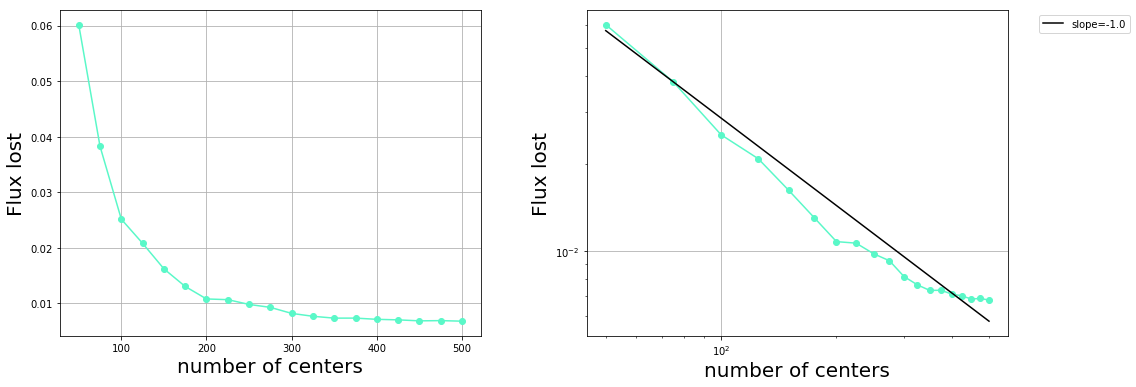

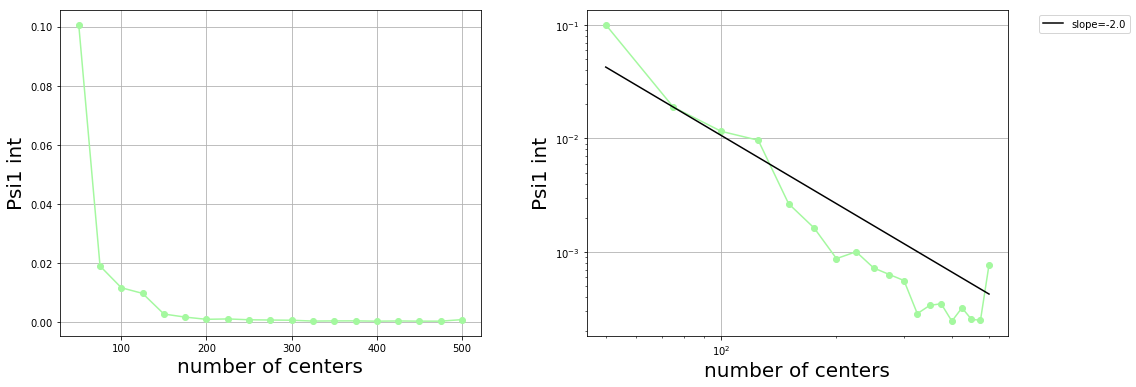

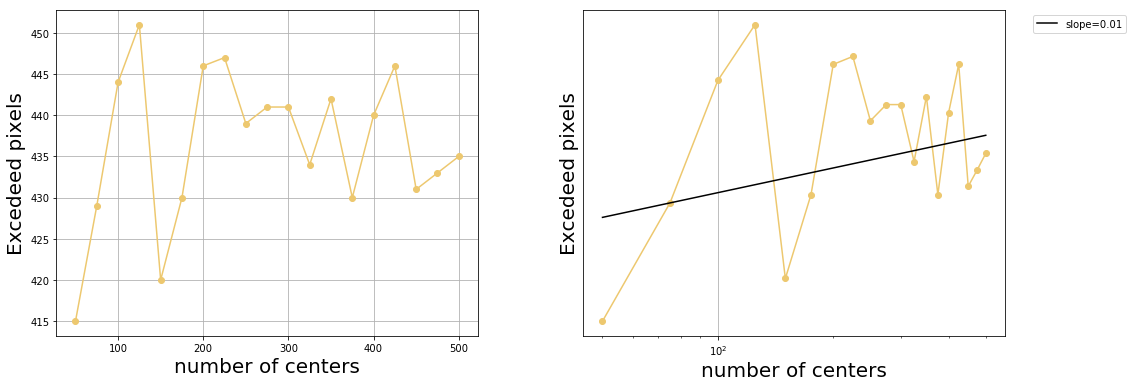

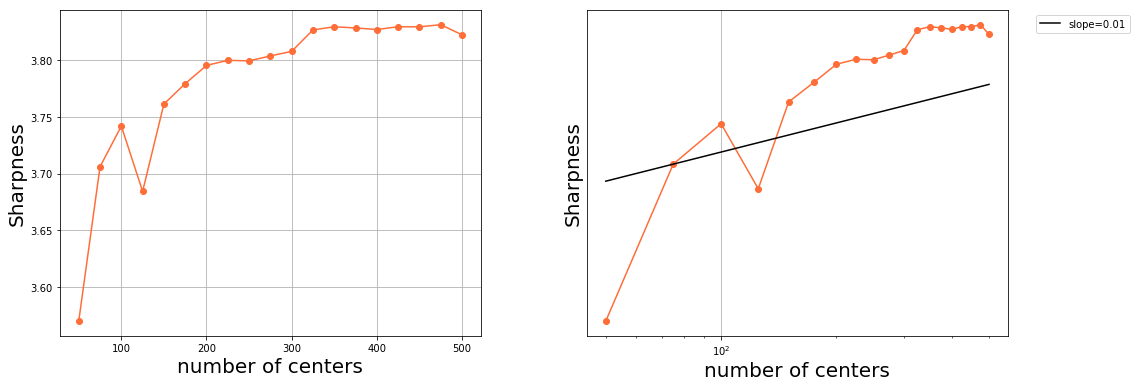

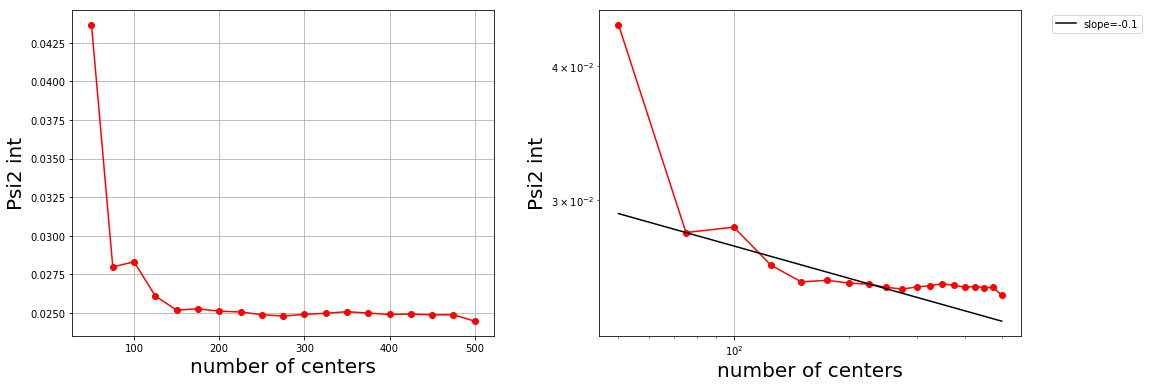

In [6]:
stats_plot(n_center, r_stats, x_label='number of centers', loglog=True, slopes=[-2.,-1.,-1.,-1.,-2.,0.01,0.01,-0.1])

In [8]:
elm_list[0].data = data
elm_list[0].data 

AttributeError: 'ELModel' object has no attribute 'mask'

In [11]:
elm = elm_list[0]

In [13]:
xc,yc,c,sig= elm.get_params_mapped()

In [21]:
sig

array([ 0.01275209,  0.01114186,  0.01559504,  0.01471565,  0.01414551,
        0.01408644,  0.01177469,  0.01555825,  0.01921828,  0.01291439,
        0.01608825,  0.0116011 ,  0.00891013,  0.01511609,  0.01382431,
        0.01417889,  0.02397531,  0.01360509,  0.0497398 ,  0.01149332,
        0.00358078,  0.00937953,  0.01696008,  0.00882996,  0.00792368,
        0.01725993,  0.0103779 ,  0.02923369,  0.04734659,  0.01851347,
        0.01666619,  0.01578824,  0.01699049,  0.01296621,  0.05166667,
        0.01465258,  0.01041607,  0.00732965,  0.02292302,  0.0223835 ,
        0.01540071,  0.01278261,  0.01546087,  0.03231971,  0.01558067,
        0.01016227,  0.02516701,  0.05166667,  0.01463847,  0.01325089])

In [16]:
_xe = np.linspace(0., 1., data.shape[0]+2)[1:-1]
_ye = np.linspace(0., 1., data.shape[1]+2)[1:-1]
Xe,Ye = np.meshgrid(_xe, _ye, sparse=False, indexing='ij')
xe = Xe.ravel(); ye = Ye.ravel()

In [30]:
ye

array([ 0.00990099,  0.01980198,  0.02970297, ...,  0.97029703,
        0.98019802,  0.99009901])

In [22]:
u_eval(c,sig,xc,yc,xe,ye)

TypeError: No matching definition for argument type(s) array(float64, 1d, C), array(float64, 1d, C), array(float64, 1d, C), array(float64, 1d, C), array(float64, 1d, C), array(float64, 1d, C), omitted(default=5)